In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools
from dmba import regressionSummary
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('bicup2006.csv')
data.head()

,DATE,TIME,DEMAND
0,1-Mar-05,6:30,1.0
1,1-Mar-05,6:45,2.0
2,1-Mar-05,7:00,4.0
3,1-Mar-05,7:15,0.0
4,1-Mar-05,7:30,10.0


In [3]:
# Convert 'DATE' column to datetime type
data['DATE'] = pd.to_datetime(data['DATE'], format='%d-%b-%y')

# Combine 'DATE' and 'TIME' columns into a single datetime column
data['DATETIME'] = pd.to_datetime(data['DATE'].astype(str) + ' ' + data['TIME'], format='%Y-%m-%d %H:%M')

data.head()

,DATE,TIME,DEMAND,DATETIME
0,2005-03-01,6:30,1.0,2005-03-01 06:30:00
1,2005-03-01,6:45,2.0,2005-03-01 06:45:00
2,2005-03-01,7:00,4.0,2005-03-01 07:00:00
3,2005-03-01,7:15,0.0,2005-03-01 07:15:00
4,2005-03-01,7:30,10.0,2005-03-01 07:30:00


In [4]:
data_original = data.copy()
# Drop the 'DATE' and 'TIME' columns
data.drop(['DATE', 'TIME'], axis=1, inplace=True)

# Set the 'DATETIME' column as the index
data.set_index('DATETIME', inplace=True)

# Sort the index in ascending order
data.sort_index(inplace=True)
data.head()

,DEMAND
DATETIME,
2005-03-01 06:30:00,1.0
2005-03-01 06:45:00,2.0
2005-03-01 07:00:00,4.0
2005-03-01 07:15:00,0.0
2005-03-01 07:30:00,10.0


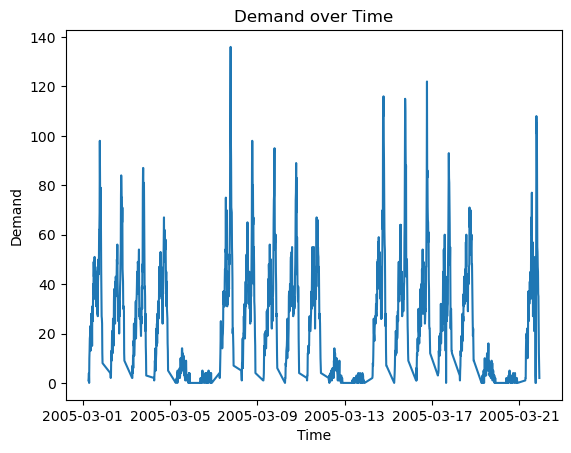

In [12]:
plt.plot(data.index, data['DEMAND'])
plt.xlabel('Time')
plt.ylabel('Demand')
plt.title('Demand over Time')
plt.show()

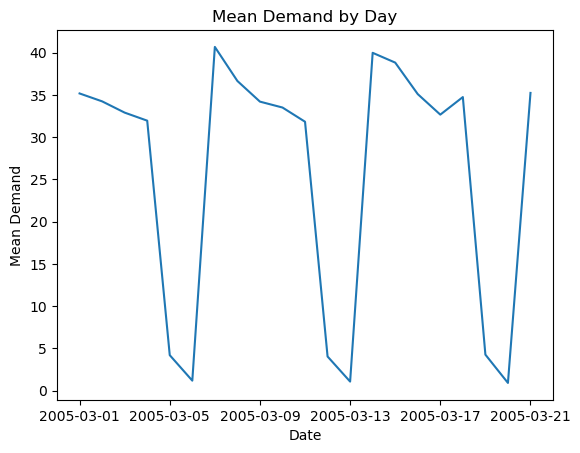

In [13]:
# Resample the data to daily frequency and calculate the mean demand for each day
daily_demand = data.resample('D').mean()

plt.plot(daily_demand.index, daily_demand['DEMAND'])
plt.xlabel('Date')
plt.ylabel('Mean Demand')
plt.title('Mean Demand by Day')
plt.show()

<Axes: xlabel='DATETIME'>

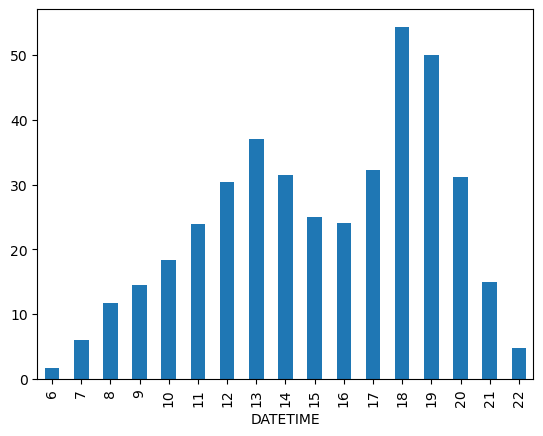

In [15]:
data.groupby(data.index.hour)['DEMAND'].mean().plot.bar()

<Axes: xlabel='DATETIME'>

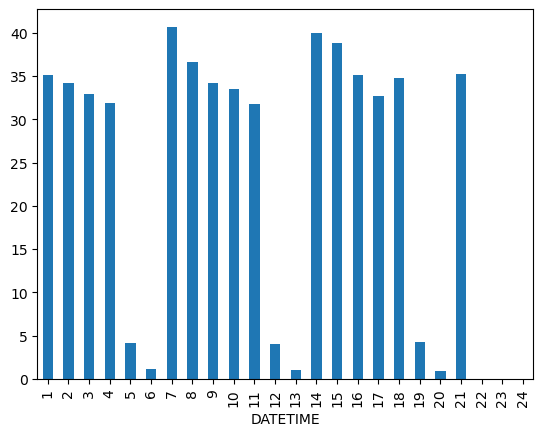

In [17]:
data.groupby(data.index.day)['DEMAND'].mean().plot.bar()

<Axes: xlabel='DATETIME'>

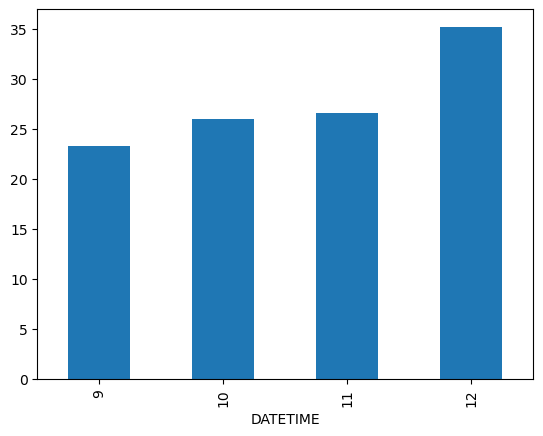

In [18]:
data.groupby(data.index.week)['DEMAND'].mean().plot.bar()

In [5]:
# Step 2: Split the data into training, validation, and future periods
training_data = data.loc[data.index < '2005-03-15']
validation_data = data.loc[(data.index >= '2005-03-15') & (data.index < '2005-03-22')]
test_data = data.loc[data.index >= '2005-03-22']

In [8]:
naive_pred = pd.Series(training_data[-441:-252].values.flatten(), index=test_data.index)
last_season = training_data[-441:].values.flatten()
seasonal_pred = pd.Series(last_season[:len(validation_data)], index=validation_data.index)

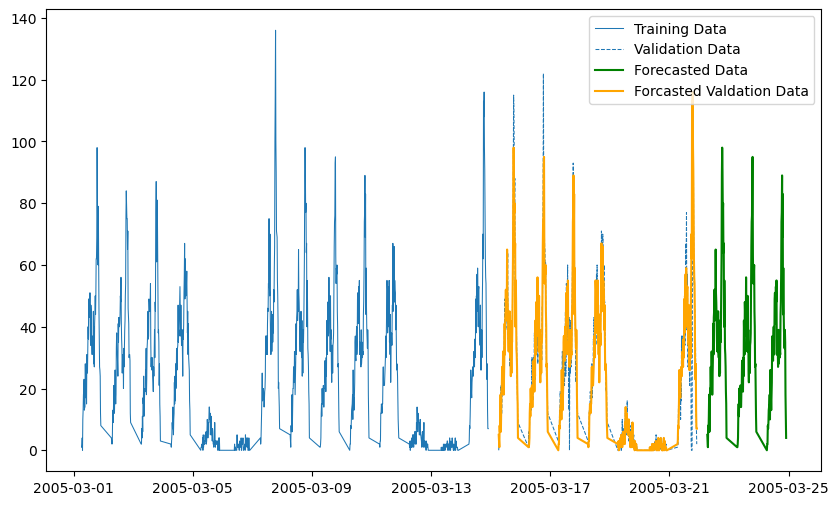

In [9]:
plt.figure(figsize=(10,6))
plt.plot(training_data, color='C0', linewidth=0.75, label = 'Training Data')
plt.plot(validation_data, color='C0', linestyle='dashed', linewidth=0.75, label = 'Validation Data')
plt.plot(naive_pred, color='green', label='Forecasted Data')
plt.plot(seasonal_pred, color='orange', label = 'Forcasted Valdation Data')
plt.legend()
plt.show()

In [10]:
regressionSummary(validation_data, seasonal_pred)


Regression statistics

               Mean Error (ME) : 0.0658
Root Mean Squared Error (RMSE) : 10.8043
     Mean Absolute Error (MAE) : 5.9705


In [11]:
print("Forecast for the Future Period:")
print(pd.DataFrame({'Datetime': test_data.index, 'Forecast': naive_pred}))

Forecast for the Future Period:
                               Datetime  Forecast
DATETIME                                         
2005-03-22 06:30:00 2005-03-22 06:30:00       5.0
2005-03-22 06:45:00 2005-03-22 06:45:00       3.0
2005-03-22 07:00:00 2005-03-22 07:00:00       1.0
2005-03-22 07:15:00 2005-03-22 07:15:00       8.0
2005-03-22 07:30:00 2005-03-22 07:30:00       6.0
...                                 ...       ...
2005-03-24 21:00:00 2005-03-24 21:00:00      39.0
2005-03-24 21:15:00 2005-03-24 21:15:00      35.0
2005-03-24 21:30:00 2005-03-24 21:30:00      18.0
2005-03-24 21:45:00 2005-03-24 21:45:00      10.0
2005-03-24 22:00:00 2005-03-24 22:00:00       4.0

[189 rows x 2 columns]


# Done!